# *Brain tumor Image Classification*

*Importing need libraries*

In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
from tensorflow import keras
import random
import shutil

*Creating Directorries for each class*

In [3]:
data_dir="DataSet2"
glimoa_path="DataSet2/glioma"
meningioma_path="DataSet2/meningioma"
notumor_path="DataSet2/notumor"
pituitary_path="DataSet2/pituitary"


*Creating Directories for train,validtion and test data*

In [4]:
train_path="DataSet2/train_data"
validation_path="DataSet2/validation_data"
test_data_path="DataSet2/test_data"

In [5]:
train_glimoa_dir=os.path.join("DataSet2/train_data/train_glimoa")
os.makedirs(train_glimoa_dir,exist_ok=True)
train_meningioma_dir=os.path.join("DataSet2/train_data/train_meningioma")
os.makedirs(train_meningioma_dir,exist_ok=True)
train_notumor_dir=os.path.join("DataSet2/train_data/train_notumor")
os.makedirs(train_notumor_dir,exist_ok=True)
train_pituitary_dir=os.path.join("DataSet2/train_data/train_pituitary")
os.makedirs(train_pituitary_dir,exist_ok=True)

In [6]:
validation_glimoa_dir=os.path.join("DataSet2/validation_data/validation_glimoa")
os.makedirs(validation_glimoa_dir,exist_ok=True)
validation_meningioma_dir=os.path.join("DataSet2/validation_data/validation_meningioma")
os.makedirs(validation_meningioma_dir,exist_ok=True)
validation_notumor_dir=os.path.join("DataSet2/validation_data/validation_notumor")
os.makedirs(validation_notumor_dir,exist_ok=True)
validation_pituitary_dir=os.path.join("DataSet2/validation_data/validation_pituitary")
os.makedirs(validation_pituitary_dir,exist_ok=True)

In [7]:
test_data_path_dir=os.path.join(test_data_path)
os.makedirs(test_data_path_dir,exist_ok=True)

*Splitting data into train, validation, and test (0.7 , 0.2 , 0.1)*

In [8]:
def split_image(select_path,train_path_dest,validation_path_dest):
    random.seed(42)
    random.shuffle(os.listdir(select_path))
    train_size = int(len(os.listdir(select_path)) * 0.70)
    val_size = int(len(os.listdir(select_path)) * 0.20)
    test_size = int(len(os.listdir(select_path)) * 0.10)
    for i, f in enumerate(os.listdir(select_path)):
        if i < train_size:
            dest_folder = train_path_dest
        elif i > train_size and i < (train_size+val_size):
            dest_folder= validation_path_dest    
        elif i >(train_size+val_size):
            dest_folder = test_data_path_dir

        shutil.copy(os.path.join(select_path, f), os.path.join(dest_folder, f))    

In [9]:
split_image(glimoa_path,train_glimoa_dir,validation_glimoa_dir)
split_image(meningioma_path,train_meningioma_dir,validation_meningioma_dir)
split_image(notumor_path,train_notumor_dir,validation_notumor_dir)
split_image(pituitary_path,train_pituitary_dir,validation_pituitary_dir)

*Comfirming the length in each splitted datasets*

In [10]:
print(len(os.listdir(train_meningioma_dir))+len(os.listdir(train_glimoa_dir))+len(os.listdir(train_notumor_dir))+len(os.listdir(train_pituitary_dir)))
print(len(os.listdir(glimoa_path)),len(os.listdir(meningioma_path)),len(os.listdir(notumor_path)),len(os.listdir(pituitary_path)))
print(len(os.listdir(train_glimoa_dir)),len(os.listdir(train_meningioma_dir)),len(os.listdir(train_notumor_dir)),len(os.listdir(train_pituitary_dir)))
print(len(os.listdir(validation_glimoa_dir)),len(os.listdir(validation_meningioma_dir)),len(os.listdir(validation_notumor_dir)),len(os.listdir(validation_pituitary_dir)))

4000
1321 1339 1595 1457
925 938 1117 1020
264 267 319 291


*data classes*

In [11]:
print(os.listdir(data_dir)[:-3])

['glioma', 'meningioma', 'notumor', 'pituitary']


*As This is a generater data set not a data set that is already pre_loaded into memory;---> <u>to access,see and grab the data , we will apply numpy_iterator fucntion</u>*

In [12]:
train_data=tf.keras.utils.image_dataset_from_directory(train_path)
validation_data=tf.keras.utils.image_dataset_from_directory(validation_path)


Found 4000 files belonging to 4 classes.
Found 1141 files belonging to 4 classes.


In [13]:
train_data_iterator=train_data.as_numpy_iterator()
train_data_batch=train_data_iterator.next()

#print(len(train_data_batch))
#train_data_batch
#train_data_batch[1]

train_data=train_data.map(lambda x, y :(x/255, y))
train_data_scalled_iterator=train_data.as_numpy_iterator()
train_data_batch=train_data_scalled_iterator.next()

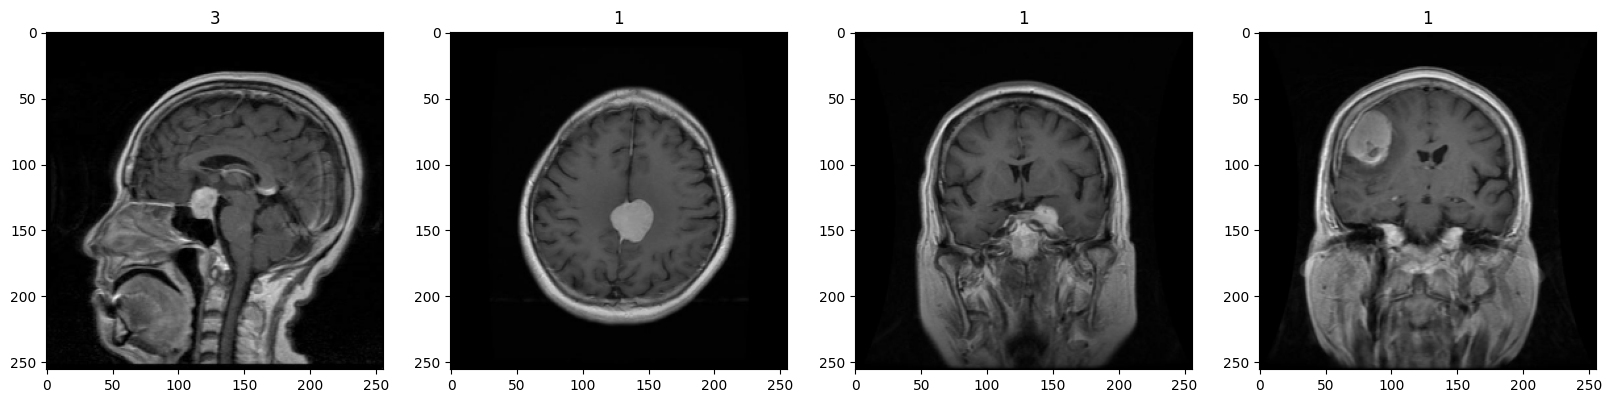

In [14]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for index,img in enumerate(train_data_batch[0][:4]):
    ax[index].imshow(img)
    ax[index].title.set_text(train_data_batch[1][index])

In [15]:
validation_data_iterator=train_data.as_numpy_iterator()
validation_data_batch=validation_data_iterator.next()

#print(len(validation_data_batch))
#validation_data_batch
#validation_data_batch[1]

validation_data=validation_data.map(lambda x, y :(x/255, y))
validation_data_scalled_iterator=validation_data.as_numpy_iterator()
validation_data_batch=validation_data_scalled_iterator.next()

In [16]:
train_data_batch[0].shape,validation_data_batch[0].shape

((32, 256, 256, 3), (32, 256, 256, 3))

In [17]:
train_glimoa_names = os.listdir(train_glimoa_dir)
train_meningioma_names = os.listdir(train_meningioma_dir)
train_notumor_names = os.listdir(train_notumor_dir)
train_pituitary_names = os.listdir(train_pituitary_dir)

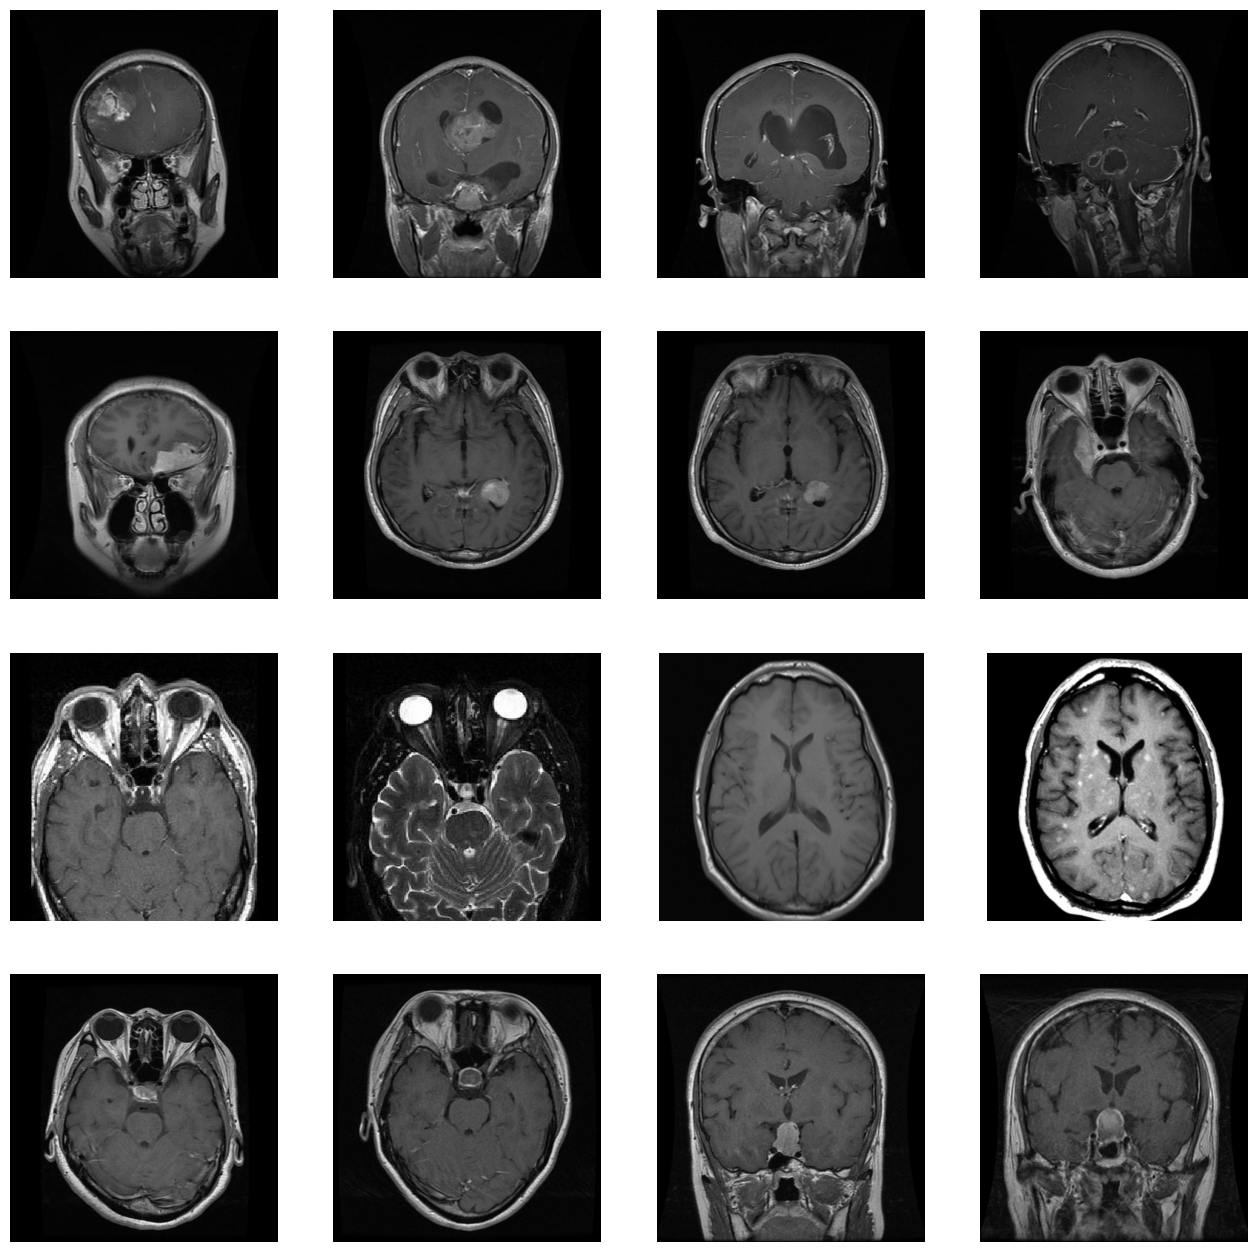

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
# Index for iterating over images
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
next_glimoa_pix = [os.path.join(train_glimoa_dir, fname) 
                for fname in train_glimoa_names[pic_index-4:pic_index]]
next_meningioma_pix = [os.path.join(train_meningioma_dir, fname) 
                for fname in train_meningioma_names[pic_index-4:pic_index]]
next_notumor_pix = [os.path.join(train_notumor_dir, fname) 
                for fname in train_notumor_names[pic_index-4:pic_index]]
next_pituitary_pix = [os.path.join(train_pituitary_dir, fname) 
                for fname in train_pituitary_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_glimoa_pix+next_meningioma_pix+next_notumor_pix+next_pituitary_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

*CNN Model :*

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [20]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [21]:
history = model.fit(
      train_data,
      validation_data = validation_data,  
      epochs=15,
      steps_per_epoch=8,
      validation_steps=8,
      verbose=2)

Epoch 1/15




8/8 - 32s - loss: 1.6945 - accuracy: 0.2539 - val_loss: 1.2979 - val_accuracy: 0.2891 - 32s/epoch - 4s/step
Epoch 2/15
8/8 - 34s - loss: 1.2630 - accuracy: 0.3633 - val_loss: 1.1953 - val_accuracy: 0.4844 - 34s/epoch - 4s/step
Epoch 3/15
8/8 - 33s - loss: 1.0453 - accuracy: 0.5273 - val_loss: 1.2703 - val_accuracy: 0.4844 - 33s/epoch - 4s/step
Epoch 4/15
8/8 - 33s - loss: 0.9796 - accuracy: 0.6133 - val_loss: 1.1130 - val_accuracy: 0.5156 - 33s/epoch - 4s/step
Epoch 5/15
8/8 - 32s - loss: 0.9818 - accuracy: 0.5742 - val_loss: 1.0886 - val_accuracy: 0.6133 - 32s/epoch - 4s/step
Epoch 6/15
8/8 - 33s - loss: 0.7024 - accuracy: 0.7500 - val_loss: 0.9436 - val_accuracy: 0.6641 - 33s/epoch - 4s/step
Epoch 7/15
8/8 - 34s - loss: 0.6965 - accuracy: 0.7539 - val_loss: 0.8853 - val_accuracy: 0.6367 - 34s/epoch - 4s/step
Epoch 8/15
8/8 - 32s - loss: 0.7314 - accuracy: 0.7109 - val_loss: 0.8854 - val_accuracy: 0.6758 - 32s/epoch - 4s/step
Epoch 9/15
8/8 - 35s - loss: 0.5530 - accuracy: 0.8047 - 

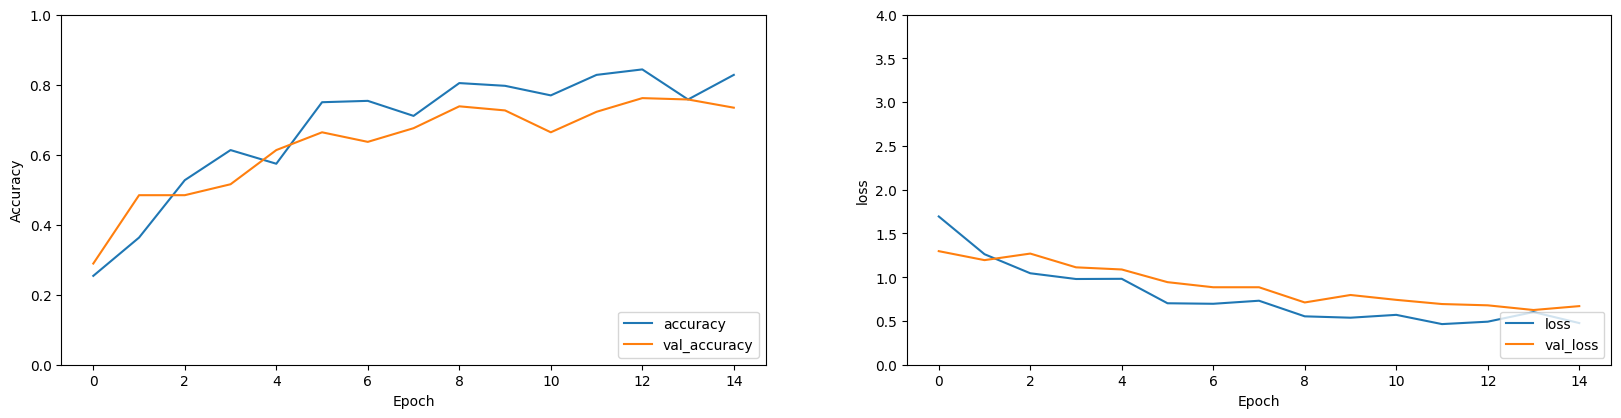

In [22]:
plt.subplot(221)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(222)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.0, 4])
plt.legend(loc='lower right')

In [23]:
img_test=cv2.imread('DataSet2/test_data/Tr-gl_1292.jpg')
img_test.shape


(512, 512, 3)

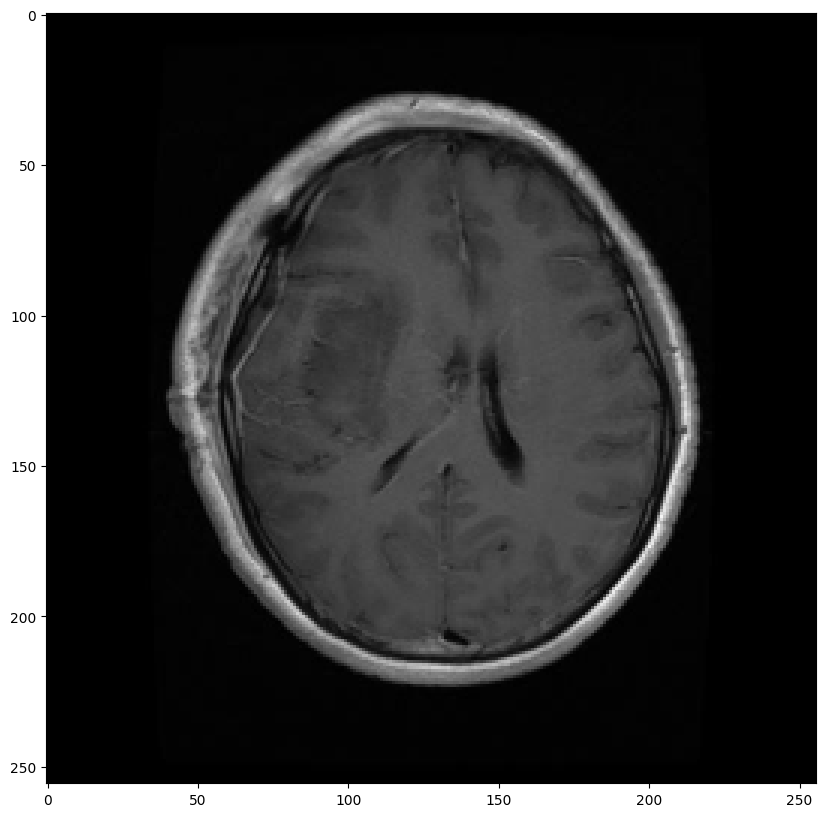

In [24]:
resize=tf.image.resize(img_test,(256,256))
plt.imshow(resize.numpy().astype(int))

In [25]:
y_predict=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 131ms/step


In [26]:
np.round(y_predict,2)

array([[0.85, 0.12, 0.02, 0.02]], dtype=float32)

In [27]:
import pickle
with open ("ImageClassification_model.pkl","wb") as f:
    pickle.dump(model,f)